When you're done, compare your work to [these example solutions](https://github.com/Thinkful-Ed/machine-learning-regression-problems/blob/master/notebooks/4.solution_understanding_the_relationship.ipynb).

# 1. Interpretation and significance

Suppose that we would like to know how much families in the US are spending on recreation annually. We've estimated the following model:

$$ expenditure = 873 + 0.0012annual\_income + 0.00002annual\_income^2 - 223.57have\_kids $$

*expenditure* is the annual spending on recreation in US dollars, *annual_income* is the annual income in US dollars, and *have_kids* is a dummy variable indicating the families with children. Interpret the estimated coefficients. What additional statistics should be given in order to make sure that your interpretations make sense statistically. Write up your answer.

### Answer:

Assuming that all the estimated coefficients are statistically significant, the coefficient, $0.0012$, indicates that for every \\$10,000 increase in annual income, recreational spending increases by 12 dollars. However, due to the quadratic (squared) term, an increase of \\$10,000 in annual income not only increase the recreation expenditure by \\$12 but also an additional $0.02$ X $annual\_income$ (original income + \\$10,000).

If families have kids, then their annual recreational spending decreases by \\$223.57 compared to those who don't have kids. The bias term is $873$, but since this term captures the information from the $non\_kids$ dummy variable holdout, it's exact meaning is hard to determine.

In order to truly know the significance of these coefficients, we would need to know the statistical significance of each one. Without being able to confirm p-values less than 0.1, and ideally less than or equal to 0.05, we can't be sure that these coefficients are statistically different from zero, and thus, are actually contributing to the explanation of the information about the outcome variable.

> Below is a plot representing expeditures for families with kids vs no kids.

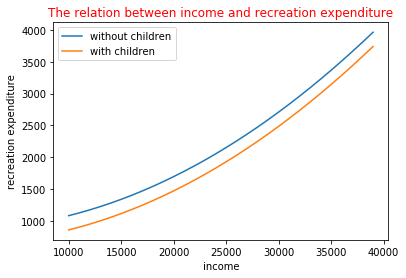

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# X represents annual income
X = np.arange(10000, 40000, 1000)

# Y represents annual expenditure on recreation for families WITHOUT children
Y = 873 + 0.0012*X + 0.000002*(X**2)

# Y_kids represents annual expenditure on recreation for families WITH children
Y_kids = (873 - 223.57) + 0.0012*X + 0.000002*(X**2)


plt1 = plt.plot(X, Y, label="without children")
plt2 = plt.plot(X, Y_kids, label="with children")
plt.xlabel("income")
plt.ylabel("recreation expenditure")
plt.title("The relation between income and recreation expenditure", color='r')
plt.legend()
plt.show()

# 2. Weather model

In this exercise, you'll work with the historical temperature data from the previous checkpoint.

* First, load the dataset from the **weatherinszeged** table from Thinkful's database.
* Build a linear regression model where your target variable is the difference between the *apparenttemperature* and the *temperature*. As explanatory variables, use *humidity* and *windspeed*. Now, estimate your model using OLS. Are the estimated coefficients statistically significant? Are the signs of the estimated coefficients in line with your previous expectations? Interpret the estimated coefficients. What are the relations between the target and the explanatory variables?

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
import seaborn as sns
import statsmodels.api as sm
from sqlalchemy import create_engine

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import warnings
warnings.filterwarnings(action="ignore")

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'weatherinszeged'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

temperature_df = pd.read_sql_query('select * from weatherinszeged',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

In [2]:
temperature_df.head(3)

,date,summary,preciptype,temperature,apparenttemperature,humidity,windspeed,windbearing,visibility,loudcover,pressure,dailysummary
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472,7.389,0.890,14.120,251.000,15.826,0.000,1015.130,Partly cloudy throughout the day.
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.356,7.228,0.860,14.265,259.000,15.826,0.000,1015.630,Partly cloudy throughout the day.
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.378,9.378,0.890,3.928,204.000,14.957,0.000,1015.940,Partly cloudy throughout the day.


In [11]:
temperature_df['residual_temp'] = temperature_df['temperature'] - temperature_df['apparenttemperature']

# scikit-learn's OLS module
Y = temperature_df.residual_temp

X = temperature_df[['humidity', 'windspeed']]

lrm = linear_model.LinearRegression()

lrm.fit(X,Y)

print(f'Coefficients: {lrm.coef_}\nIntercept: {lrm.intercept_}')

Coefficients: [3.02918594 0.11929075]
Intercept: -2.438105415187704


In [14]:
# stats model's OLS module
X_stats = sm.add_constant(X)

sm.OLS(Y, X_stats).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          residual_temp   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                 1.949e+04
Date:                Thu, 23 Jan 2020   Prob (F-statistic):               0.00
Time:                        19:30:50   Log-Likelihood:            -1.7046e+05
No. Observations:               96453   AIC:                         3.409e+05
Df Residuals:                   96450   BIC:                         3.409e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.4381      0.021   -115.948      0.000      -2.479      -2.397
humidity       3.0292      0.024    126.479      0.000       2.982       3.076
windspeed      0.1193      0.001    176.164      0.000       0.118       0.121
==============================================================================
Omnibus:                     3935.747   Durbin-Watson:                   0.267
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4613.311
Skew:                           0.478   Prob(JB):                         0.00
Kurtosis:                       3.484   Cond. No.                         88.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Are the estimated coefficients statistically significant? 
* Yes. They all have p-values very close to zero.

### Are the signs of the estimated coefficients in line with your previous expectations?
* Yes. I would imagine that both increased humidity and increased wind speed would contribute to increased difference between the actual temperature and perceived temperature.

### Interpret the estimated coefficients. What are the relations between the target and the explanatory variables?
* With every increase in humidity (whatever its unit of measurement is), the difference in actual temperature vs. perceived temperature increases by 3 degrees. With every ten increases in windspeed's unit of measurement, the difference in actual temperature vs. perceived temperature increases by about 1.2 degrees. 

<font color='red'>NOTE:</font> $temperature\_df['temperature'] - temperature\_df['apparenttemperature']$ gives our coefficients positive values, and so we interpret the changes in temperature difference as positive. However, had we created $temperature\_df['residual\_temp']$ with $temperature\_df['apparenttemperature'] - temperature\_df['temperature']$, our coefficients would have been negative. This might lead us to believe that with changes in humidity and wind speed, the temperature difference decreases.

> * Next, include the interaction of *humidity* and *windspeed* to the model above and estimate the model using OLS.

In [22]:
temperature_df['wind_humid'] = temperature_df['humidity'] * temperature_df['windspeed']

X_2 = temperature_df[['humidity', 'windspeed', 'wind_humid']]

# scikit-learn OLS
lrm.fit(X_2,Y)

print(f'Coefficients: {lrm.coef_}\nIntercept: {lrm.intercept_}')

Coefficients: [-0.17751219 -0.09048213  0.29711946]
Intercept: -0.08393631009782809


In [23]:
# stats model's OLS
X_interact = sm.add_constant(X_2)

sm.OLS(Y, X_interact).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          residual_temp   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                 1.666e+04
Date:                Thu, 23 Jan 2020   Prob (F-statistic):               0.00
Time:                        19:47:52   Log-Likelihood:            -1.6669e+05
No. Observations:               96453   AIC:                         3.334e+05
Df Residuals:                   96449   BIC:                         3.334e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0839      0.033     -2.511      0.012      -0.149      -0.018
humidity      -0.1775      0.043     -4.133      0.000      -0.262      -0.093
windspeed     -0.0905      0.002    -36.797      0.000      -0.095      -0.086
wind_humid     0.2971      0.003     88.470      0.000       0.291       0.304
==============================================================================
Omnibus:                     4849.937   Durbin-Watson:                   0.265
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9295.404
Skew:                           0.378   Prob(JB):                         0.00
Kurtosis:                       4.320   Cond. No.                         193.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Are the coefficients statistically significant?
* Yes, all the p-values are below 0.05 with each feature's p-value close to zero.

### Did the signs of the estimated coefficients for *humidity* and *windspeed* change? Interpret the estimated coefficients.
* Yes, they did change. Our coefficient for our interactive feature, $wind\_humid$, tells us that for every 10 unit increase in $wind\_humid$ the perceived difference between actual temperature and perceived temperature increases by almost 3 degrees. However, increases in either wind or humidity, with the other held constant, actual produces a drop in the temperature difference. We can interpret it as follows:
> Given a windspeed level, 1 point increase in humidity results in (0.30 X windspeed point increase) - 0.18 in the target. So, the humidity mitigates the effect of windspeed on the target. Similarly for a given humidity level, 1 point increase in the windspeed results in (0.30 X humidity point increase) - 0.09 in the target. So, the windspeed also mitigates the effect of humidity on the target.

#  3. House prices model
* Load the **houseprices** data from Thinkful's database.
* Run your house prices model again and interpret the results.

In [41]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import seaborn as sns
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
houses_df = pd.read_sql_query('select * from houseprices',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

houses_df.head(3)

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.000,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.000,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.000,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500


In [42]:
# Replace missing numerical values with the mean and missing categoricals ('None') with 'No--' 
# -- = first to letters of feature, ie. NoFe = 'no fence' 
# and the lone missing electrical value with house_df.electrical.mode()

houses_df['electrical'].fillna(str(houses_df['electrical'].mode()), inplace=True)

for column_name in houses_df.columns[3:]:
    for idx, value in enumerate(houses_df[column_name]):
        if pd.isna(value):
            try:
                houses_df[column_name].fillna(houses_df[column_name].mean(), inplace=True)
            except:
                houses_df[column_name].fillna('No' + column_name[:2].capitalize(), inplace=True)

In [43]:
# Creating our dummy variables
columns = ['alley','poolqc','garagetype']

# Create a dataframe with added dummy features
houses_df_dummies = pd.get_dummies(houses_df, columns=columns, drop_first=True)
dummy_columns = [c for c in houses_df_dummies.columns if any([c.startswith(n) for n in columns])]
dummy_columns

['alley_NoAl',
 'alley_Pave',
 'poolqc_Fa',
 'poolqc_Gd',
 'poolqc_NoPo',
 'garagetype_Attchd',
 'garagetype_Basment',
 'garagetype_BuiltIn',
 'garagetype_CarPort',
 'garagetype_Detchd',
 'garagetype_NoGa']

In [44]:
X = houses_df_dummies[dummy_columns]
Y = houses_df_dummies.saleprice

# We need to manually add a constant in statsmodels' sm
X = sm.add_constant(X)

results = sm.OLS(Y,X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.274
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     49.80
Date:                Fri, 24 Jan 2020   Prob (F-statistic):           5.54e-93
Time:                        22:20:20   Log-Likelihood:                -18310.
No. Observations:                1460   AIC:                         3.664e+04
Df Residuals:                    1448   BIC:                         3.671e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               4.617e+05   5.62e+04      8.213      0.000    3.51e+05    5.72e+05
alley_NoAl           1.42e+04   1.01e+04      1.409      0.159   -5569.785     3.4e+04
alley_Pave          3.358e+04   1.43e+04      2.341      0.019    5445.283    6.17e+04
poolqc_Fa          -3.091e+05    6.8e+04     -4.548      0.000   -4.42e+05   -1.76e+05
poolqc_Gd          -3.226e+05    6.2e+04     -5.200      0.000   -4.44e+05   -2.01e+05
poolqc_NoPo        -3.222e+05   4.81e+04     -6.702      0.000   -4.17e+05   -2.28e+05
garagetype_Attchd    4.87e+04   2.79e+04      1.747      0.081   -5972.562    1.03e+05
garagetype_Basment  6920.7635   3.19e+04      0.217      0.828   -5.56e+04    6.94e+04
garagetype_BuiltIn  1.011e+05   2.87e+04      3.522      0.000    4.48e+04    1.57e+05
garagetype_CarPort -4.369e+04   3.58e+04     -1.219      0.223   -1.14e+05    2.66e+04
garagetype_Detchd  -2.049e+04    2.8e+04     -0.733      0.464   -7.53e+04    3.44e+04
garagetype_NoGa    -4.958e+04   2.88e+04     -1.725      0.085   -1.06e+05    6812.576
==============================================================================
Omnibus:                      621.430   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4177.383
Skew:                           1.850   Prob(JB):                         0.00
Kurtosis:                      10.415   Cond. No.                         106.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Which features are statistically significant, and which are not?
* $alley\_NoAl$, $garagetype\_Basment$, $garagetype\_CarPort$ and $garagetype\_Detchd$ are not statistically significant.

### Now, exclude the insignificant features from your model. 

In [48]:
remove_list = ['alley_NoAl', 'garagetype_Basment', '$garagetype_CarPort', 'garagetype_Detchd']

dummy_cols = [col for col in dummy_columns if col not in remove_list]
dummy_cols

['alley_Pave',
 'poolqc_Fa',
 'poolqc_Gd',
 'poolqc_NoPo',
 'garagetype_Attchd',
 'garagetype_BuiltIn',
 'garagetype_CarPort',
 'garagetype_NoGa']

In [51]:
X = houses_df_dummies[dummy_cols]
Y = houses_df_dummies.saleprice

sm.add_constant(X)

sm.OLS(Y,X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              saleprice   R-squared (uncentered):                   0.875
Model:                            OLS   Adj. R-squared (uncentered):              0.874
Method:                 Least Squares   F-statistic:                              1271.
Date:                Fri, 24 Jan 2020   Prob (F-statistic):                        0.00
Time:                        22:30:04   Log-Likelihood:                         -18356.
No. Observations:                1460   AIC:                                  3.673e+04
Df Residuals:                    1452   BIC:                                  3.677e+04
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
alley_Pave          1.997e+04   1.12e+04      1.776      0.076   -2089.086     4.2e+04
poolqc_Fa            1.45e+05   4.97e+04      2.917      0.004    4.75e+04    2.42e+05
poolqc_Gd           1.315e+05   4.07e+04      3.234      0.001    5.17e+04    2.11e+05
poolqc_NoPo         1.323e+05   3539.815     37.367      0.000    1.25e+05    1.39e+05
garagetype_Attchd   7.052e+04   4240.545     16.629      0.000    6.22e+04    7.88e+04
garagetype_BuiltIn  1.225e+05   8261.948     14.825      0.000    1.06e+05    1.39e+05
garagetype_CarPort -2.231e+04   2.36e+04     -0.945      0.345   -6.86e+04     2.4e+04
garagetype_NoGa    -2.945e+04   8527.214     -3.453      0.001   -4.62e+04   -1.27e+04
==============================================================================
Omnibus:                      803.709   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10046.234
Skew:                           2.297   Prob(JB):                         0.00
Kurtosis:                      15.001   Cond. No.                         32.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Did anything change?
* Yes. Now there is a new variable that are no longer statistically significant, $garagetype\_CarPort$.

### Interpret the statistically significant coefficients by quantifying their relations with the house prices. Which features have a more prominent effect on house prices?
* A	paved alley adds \\$19,970 to the value of a home.
* A fair pool quality adds \\$145,000.
* A good pool quality adds \\$131,500.
* No pool adds \\$132,300.
* Attached garage adds \\$70,520.
* Built-in garage adds \\$122,500.
* No garage <font color='red'>subtracts</font> \\$29,450.

### Do the results sound reasonable to you? If not, try to explain the potential reasons.

* No, the results do not sound reasonable to me, because it doesn't make sense that a fair pool would add more value to a home than a good pool, or that no pool would add more value than a good pool. Aside from that, the values they add to a home seem too high. I suspect this is due to high correlation between the variables.

* The garage variables seem to make sense relative to each other, although their values might also be a bit high.

In [53]:
houses_df_dummies[dummy_cols].corr()

,alley_Pave,poolqc_Fa,poolqc_Gd,poolqc_NoPo,garagetype_Attchd,garagetype_BuiltIn,garagetype_CarPort,garagetype_NoGa
alley_Pave,1.000,-0.006,-0.008,0.012,-0.122,-0.043,-0.013,-0.005
poolqc_Fa,-0.006,1.000,-0.002,-0.534,0.031,-0.009,-0.003,-0.009
poolqc_Gd,-0.008,-0.002,1.000,-0.654,0.037,-0.011,-0.004,-0.011
poolqc_NoPo,0.012,-0.534,-0.654,1.000,-0.037,0.018,0.005,0.017
garagetype_Attchd,-0.122,0.031,0.037,-0.037,1.000,-0.308,-0.096,-0.294
garagetype_BuiltIn,-0.043,-0.009,-0.011,0.018,-0.308,1.000,-0.020,-0.061
garagetype_CarPort,-0.013,-0.003,-0.004,0.005,-0.096,-0.020,1.000,-0.019
garagetype_NoGa,-0.005,-0.009,-0.011,0.017,-0.294,-0.061,-0.019,1.000


> #### We can see that there are some strong correlations. especially between 'no pool' and both pool qualities.